In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Evaporation

In [4]:
df = pd.read_csv("..\Data\evap.csv", parse_dates=True, skiprows = 23, delimiter="\\s+") 
df.columns = ["date", "evap [mm/day]", "Nan", "NaN"]
df.drop(columns=["Nan", "NaN"], inplace=True)
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
display(df.head())
peaks = find_peaks(df["evap [mm/day]"], height=3.5)
exceedances = df["evap [mm/day]"][peaks[0]]
print("Number of evaporation exceedances:", len(exceedances))

<>:1: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
<>:1: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
C:\Users\max\AppData\Local\Temp\ipykernel_24944\3750865483.py:1: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
  df = pd.read_csv("..\Data\evap.csv", parse_dates=True, skiprows = 23, delimiter="\\s+")


,date,evap [mm/day]
0,1950-01-01,-0.044031
1,1950-01-02,-0.073085
2,1950-01-03,-0.056752
3,1950-01-04,-0.010418
4,1950-01-05,-0.004244


Number of evaporation exceedances: 31


(np.float64(-7305.0), np.float64(20392.0))

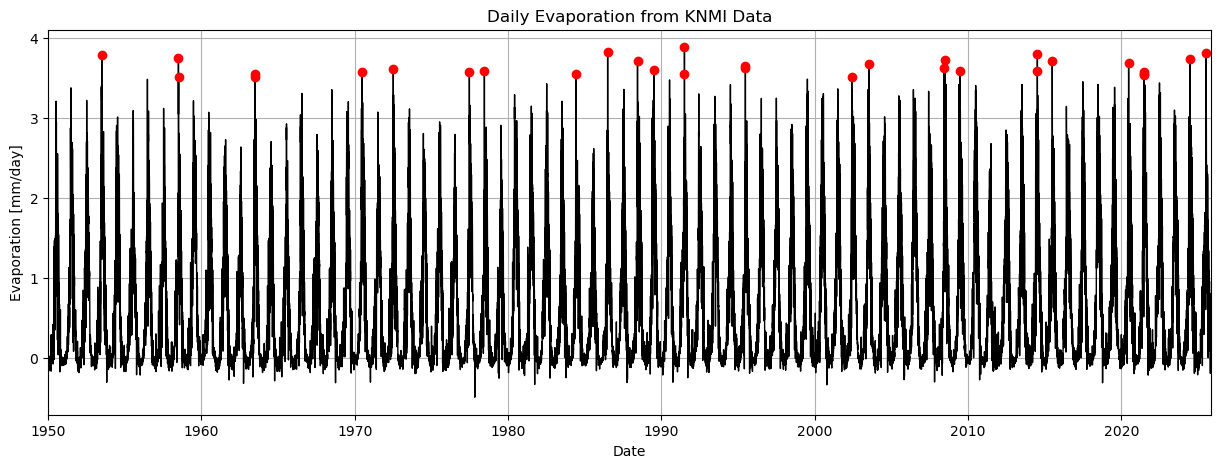

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["date"], df["evap [mm/day]"], label="Daily Evaporation", color="black", linewidth=1)
ax.set_title("Daily Evaporation from KNMI Data")
ax.set_xlabel("Date")
ax.set_ylabel("Evaporation [mm/day]")
ax.plot(df["date"][peaks[0]], df["evap [mm/day]"][peaks[0]], 'ro')
ax.grid(True)
ax.set_xlim([df["date"].min(), df["date"].max()])

Text(0.5, 0, 'Evaporation [mm/day]')

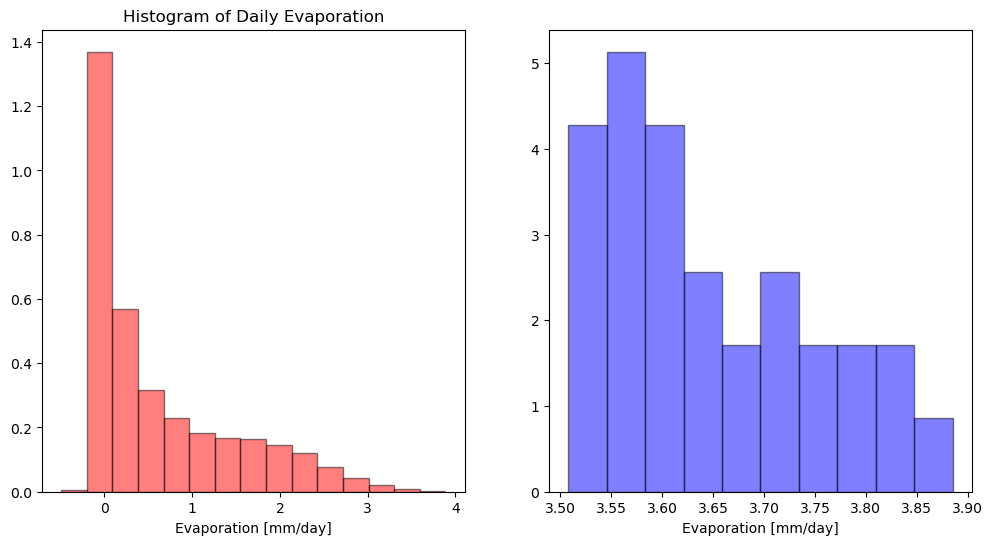

In [6]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].hist(df["evap [mm/day]"], bins=15, color="red", edgecolor="black", alpha=0.5, density=True)
axes[0].set_title("Histogram of Daily Evaporation")
axes[0].set_xlabel("Evaporation [mm/day]")
axes[1].hist(exceedances, bins=10, color = "blue", edgecolor = 'black', alpha=0.5, density=True)
axes[1].set_xlabel("Evaporation [mm/day]")